In [1]:
# Supervised Learning Algorithms - KNN: Build a KNN model for predicting if a person will have
# diabetes or not with a high accuracy score. Perform some appropriate Pre-Processing steps on
# the given dataset for better results. Implement the KNN algorithm on your own. Try other
# possible processes that can be done to dataset and tuning the model to increase accuracy such
# as Increase K value, Normalization and Different Distance Metrics. Perform Feature Ablation
# Study. Additional Tries: Weight the features before doing KNN prediction.

In [66]:
# from sklearn.neighbors import KNeighborsClassifier 

import numpy as np

class KNNClassifier:
    def __init__(self,n_neighbours=3) -> None:
        self.n_neighbours=n_neighbours
    
    #No preprocessing or calcualtion required in  .fit
    def fit(self,X,y):
        self.X=X
        self.y=y

    #to predict on new value
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            #Distance between each point from .fit and each new data point
            distances = []
            for i, x_train in enumerate(self.X):
                dist = np.sqrt(np.sum((x - x_train)**2))
                distances.append((i, dist))
            #Listing only the nearest k neighbours
            distances.sort(key=lambda x: x[1])
            k_nearest = [self.y[i] for i, _ in distances[:self.n_neighbours]]
             # Get the most frequent label among the k nearest neighbors
            prediction = max(set(k_nearest), key=k_nearest.count)
            predictions.append(prediction)
        return predictions
    
    

In [67]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [72]:
# Init
knn = KNNClassifier(n_neighbours=50)
# Fit
knn.fit(X_train,y_train)

In [73]:
# Predict
y_pred = knn.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix , accuracy_score
acc = accuracy_score(y_pred,y_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)
print(acc)

[[ 9  0  0]
 [ 0 11  2]
 [ 0  1  7]]
0.9


In [75]:
k_vals=[]
acc_vals=[]
for i in range(5,100,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    k_vals.append(i)
    acc_vals.append(acc)

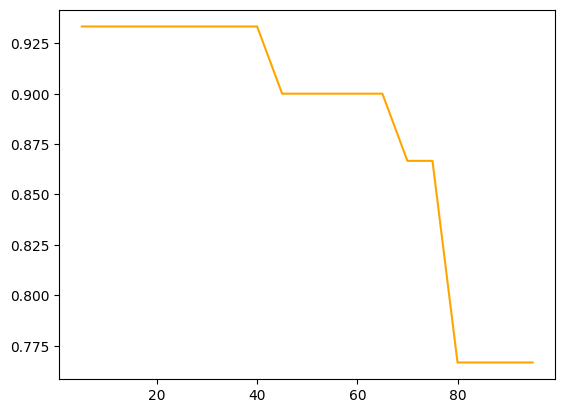

In [76]:
import matplotlib.pyplot as plt
plt.plot(k_vals,acc_vals,color='orange')
plt.show()